In [1]:
from data import ImageNetForPIXGAN
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

from generator import Generator
from discriminator import Discriminator
from torchinfo import summary

In [2]:
root_dir = 'ImageNet3'

input_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale()
])

target_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.ColorJitter(
    #     brightness=0.2,   # Adjust brightness by a factor of 0.8 to 1.2
    #     contrast=0.2,     # Adjust contrast by a factor of 0.8 to 1.2
    #     saturation=0.2,   # Adjust saturation by a factor of 0.8 to 1.2
    #     hue=0.1           # Adjust hue by a factor of -0.1 to 0.1
    # ),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3),
])

data = ImageNetForPIXGAN(root=root_dir, transform=input_transform, target_transform=target_transform)
len(data)

98

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


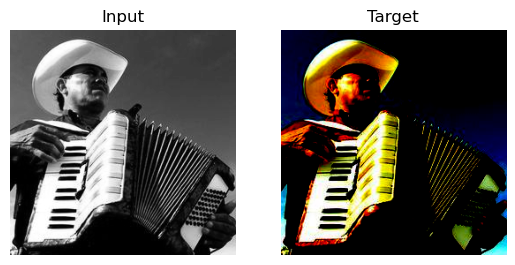

In [3]:
random_idx = torch.randint(0,len(data),(1,))
image = data[random_idx]
input_img = image['Input']
target_img = image['Target']

plt.subplot(1,2,1)
plt.imshow(input_img.permute(1,2,0), cmap='gray')
plt.title('Input')
plt.axis(False);

plt.subplot(1,2,2)
plt.imshow(target_img.permute(1,2,0))
plt.title('Target')
plt.axis(False);

In [4]:
# Testing the generator 

model = Generator(in_channels=1, out_channels=3)
summary(model=model,
        input_size=(5,1,256,256),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
Generator (Generator)                    [5, 1, 256, 256]     [5, 3, 256, 256]     --                   True
├─ModuleList (downs)                     --                   --                   --                   True
│    └─Sequential (0)                    [5, 1, 256, 256]     [5, 64, 128, 128]    --                   True
│    │    └─Conv2d (0)                   [5, 1, 256, 256]     [5, 64, 128, 128]    1,088                True
│    │    └─LeakyReLU (1)                [5, 64, 128, 128]    [5, 64, 128, 128]    --                   --
│    └─Block (1)                         [5, 64, 128, 128]    [5, 128, 64, 64]     --                   True
│    │    └─Sequential (block)           [5, 64, 128, 128]    [5, 128, 64, 64]     131,328              True
│    └─Block (2)                         [5, 128, 64, 64]     [5, 256, 32, 32]     --                   True
│    │    └─Sequ

In [5]:
# Testing the discriminator

model = Discriminator(in_channels=6)
summary(model=model,
        input_size=((5,3,256,256), (5,3,256,256)),
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
Discriminator (Discriminator)            [5, 3, 256, 256]     [5, 1, 26, 26]       --                   True
├─ModuleList (layers)                    --                   --                   --                   True
│    └─Sequential (0)                    [5, 6, 256, 256]     [5, 63, 128, 128]    --                   True
│    │    └─Conv2d (0)                   [5, 6, 256, 256]     [5, 63, 128, 128]    6,111                True
│    │    └─LeakyReLU (1)                [5, 63, 128, 128]    [5, 63, 128, 128]    --                   --
│    └─ConvBlock (1)                     [5, 63, 128, 128]    [5, 128, 63, 63]     --                   True
│    │    └─Sequential (conv)            [5, 63, 128, 128]    [5, 128, 63, 63]     129,280              True
│    └─ConvBlock (2)                     [5, 128, 63, 63]     [5, 256, 30, 30]     --                   True
│    │    └─Sequ